In [2]:
import wandb

api = wandb.Api()

### Transformer Loss Values

In [89]:
runs_1 = api.runs("shehper/owt-scaling")
runs_2 = api.runs("shehper/scale_gpt")

layer8_runs = {}

for run in runs_1:
    n_layer = run.config["n_layer"]
    n_embd = run.config["n_embd"]
    if n_layer == 8 and n_embd in [128, 256] and run.config["scale_N"]:
        layer8_runs[(n_layer, n_embd)] = run

for run in runs_2:
    if run.id == "6zldiyut":
        layer8_runs[(8, 512)] = run
    if run.id == "jw1c1yad":
        layer8_runs[(8, 768)] = run


In [90]:
losses_dict = {}
for (n_layer, n_embd), run in layer8_runs.items():
    losses_dict[12 * 8 * n_embd**2] = run.summary["train/loss"]
    print(n_layer, n_embd, run.summary["train/loss"], run.summary["val/loss"])
    

8 128 4.060868740081787 4.066900253295898
8 256 3.5958588123321533 3.622395038604736
8 512 3.245028495788574 3.250788927078247
8 768 3.0515332221984863 3.061953067779541


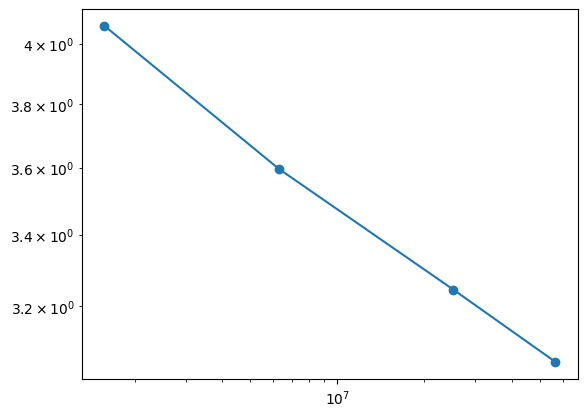

In [91]:
import matplotlib.pyplot as plt

Ns = list(losses_dict.keys())
losses = list([losses_dict[N] for N in Ns])

plt.plot(Ns, losses, '-o')
plt.xscale("log")
plt.yscale("log")
plt.show()

In [92]:
for n_embd in [128, 256, 512, 768]:
    print(12 * 8 * n_embd**2 / 1e6)

1.572864
6.291456
25.165824
56.623104


Scaling law with N: L(N)= (N/7.06e+13)^-0.0793


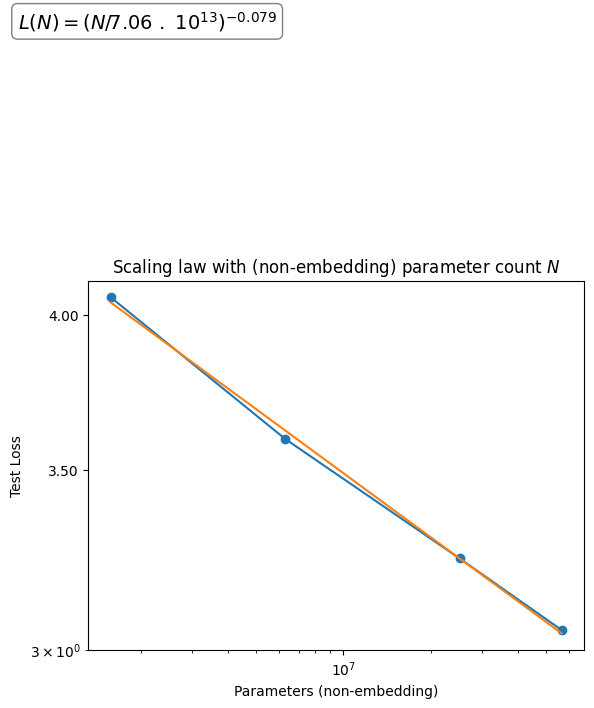

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter

def linear_fit(xs, ys):
    # xs, ys may each be a Python list or 1d numpy array of x and y values
    model = LinearRegression()
    model.fit(np.array(xs).reshape(-1, 1), np.array(ys).reshape(-1, 1))
    slope, intercept = model.coef_[0][0], model.intercept_[0]
    return slope, intercept


#Fit to the equation in log-space: log(L) = alpha_N log(N_c) - alpha_N log(N)
slope, intercept = linear_fit(np.log(Ns), np.log(losses))
alpha_N, N_c = -slope, np.exp(-intercept/slope)
print(f'Scaling law with N: L(N)= (N/{N_c:.2e})^{-alpha_N:.4f}')
textLN =  "$L(N) = (N/{0} \ . \ 10^{{{1}}})^{{{2}}}$".format(*f'{N_c:.2e}'.split('e+') + [f'{-alpha_N:.3f}'])

#plt.figure(dpi=1200)
# Plot the data and fit
plt.plot(Ns, losses, '-o')
plt.plot(Ns,(N_c/np.array(Ns))**alpha_N , '-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Parameters (non-embedding)")
plt.ylabel("Test Loss")
plt.yticks(np.arange(3.5, 4.25, 0.5))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.text(7.5e5, 5.2, textLN, verticalalignment='top', fontsize=14,
         bbox= dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title("Scaling law with (non-embedding) parameter count $N$")
plt.savefig('../figs/scaling.png')
plt.show()

-0.07939049270919059
Scaling law with N: L(N)= (N/9.67e+13)^-0.0794


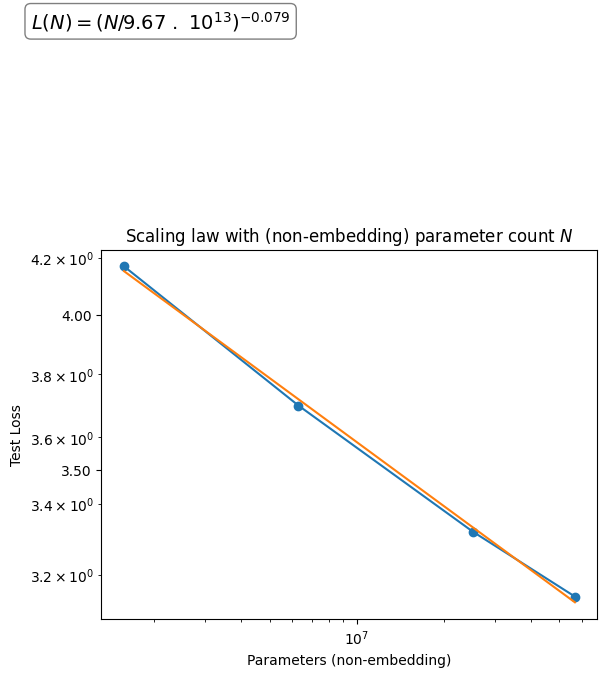

In [96]:
losses = [4.17, 3.70, 3.32, 3.14]

#Fit to the equation in log-space: log(L) = alpha_N log(N_c) - alpha_N log(N)
slope, intercept = linear_fit(np.log(Ns), np.log(losses))
alpha_N, N_c = -slope, np.exp(-intercept/slope)
print(f'Scaling law with N: L(N)= (N/{N_c:.2e})^{-alpha_N:.4f}')
textLN =  "$L(N) = (N/{0} \ . \ 10^{{{1}}})^{{{2}}}$".format(*f'{N_c:.2e}'.split('e+') + [f'{-alpha_N:.3f}'])

#plt.figure(dpi=1200)
# Plot the data and fit
plt.plot(Ns, losses, '-o')
plt.plot(Ns,(N_c/np.array(Ns))**alpha_N , '-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Parameters (non-embedding)")
plt.ylabel("Test Loss")
plt.yticks(np.arange(3.5, 4.25, 0.5))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.text(7.5e5, 5.2, textLN, verticalalignment='top', fontsize=14,
         bbox= dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title("Scaling law with (non-embedding) parameter count $N$")
#plt.savefig('../figs/scaling.png')
plt.show()

Scaling law with N: L(N)= (N/3.64e+13)^-0.0879


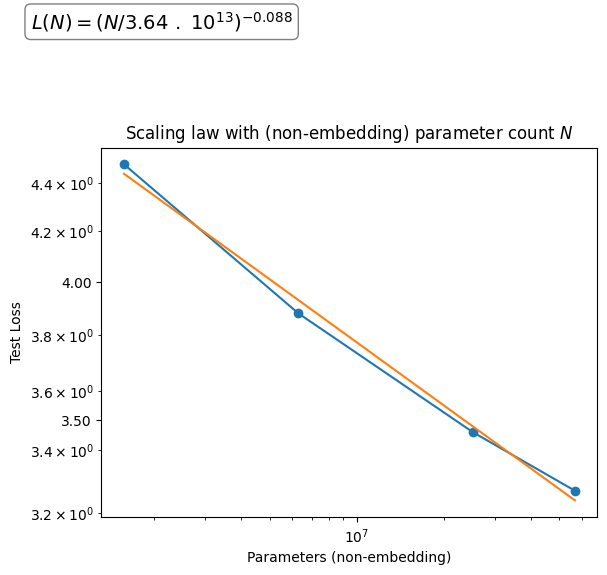

In [95]:
losses = [4.48, 3.88, 3.46, 3.27]

#Fit to the equation in log-space: log(L) = alpha_N log(N_c) - alpha_N log(N)
slope, intercept = linear_fit(np.log(Ns), np.log(losses))
alpha_N, N_c = -slope, np.exp(-intercept/slope)
print(f'Scaling law with N: L(N)= (N/{N_c:.2e})^{-alpha_N:.4f}')
textLN =  "$L(N) = (N/{0} \ . \ 10^{{{1}}})^{{{2}}}$".format(*f'{N_c:.2e}'.split('e+') + [f'{-alpha_N:.3f}'])

#plt.figure(dpi=1200)
# Plot the data and fit
plt.plot(Ns, losses, '-o')
plt.plot(Ns,(N_c/np.array(Ns))**alpha_N , '-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Parameters (non-embedding)")
plt.ylabel("Test Loss")
plt.yticks(np.arange(3.5, 4.25, 0.5))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.text(7.5e5, 5.2, textLN, verticalalignment='top', fontsize=14,
         bbox= dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.title("Scaling law with (non-embedding) parameter count $N$")
#plt.savefig('../figs/scaling.png')
plt.show()

### SAEs for final checkpoints

In [15]:
runs = api.runs("shehper/8_layer_models_saes_24576_latents")

In [16]:
my_runs = {
    "ngd29532": None,
    "7g6hq05j": None,
    "fyqbawtf": None,
    "443ngubm": None,
}
for run in runs:
    for my_run in my_runs.keys():
        if my_run in run.config["checkpoint_path"]:
            my_runs[my_run] = run

In [17]:
for my_run, run in my_runs.items():
    config = run.config
    summary = run.summary
    print(my_run)
    print(config)
    print(summary)

ngd29532
{'lr': 5e-05, 'd_in': 128, 'seed': 42, 'd_sae': 24576, 'dtype': 'float32', 'device': 'cuda', 'lr_end': 5e-06, 'resume': False, 'lp_norm': 1, 'verbose': True, 'autocast': False, 'run_name': '24576-L1-2.0-LR-5e-05-Tokens-1.024e+09', 'wandb_id': None, 'hook_eval': 'NOT_IN_USE', 'hook_name': 'blocks.6.hook_resid_pre', 'streaming': False, 'adam_beta1': 0.9, 'adam_beta2': 0.999, 'hook_layer': 6, 'model_name': '/scratch/mas1107/feature_universality/llm_checkpoints/8-128/ckpt_final.pt', 'autocast_lm': False, 'compile_llm': False, 'compile_sae': False, 'noise_scale': 0, 'prepend_bos': True, 'architecture': 'gated', 'context_size': 512, 'dataset_path': 'apollo-research/Skylion007-openwebtext-tokenizer-gpt2', 'log_to_wandb': True, 'seqpos_slice': [None], 'wandb_entity': None, 'activation_fn': 'relu', 'n_checkpoints': 1, 'wandb_project': '8_layer_models_saes_24576_latents', 'l1_coefficient': 2, 'lr_decay_steps': 50000, 'n_eval_batches': 10, 'checkpoint_path': '/scratch/mas1107/feature_uni

In [18]:
metrics = ["losses/l1_loss",
           "losses/mse_loss",
           "metrics/explained_variance",
           "metrics/explained_variance_std",
           "metrics/mean_log10_feature_sparsity",
           "metrics/l0",
           "model_performance_preservation",
           "sparsity",
           "reconstruction_quality",
           "shrinkage",]

In [19]:
for my_run, run in my_runs.items():
    summary = run.summary
    print(my_run)
    for metric in metrics:
        print(metric, summary[metric])
    print("==="*50)

ngd29532
losses/l1_loss 10.885644912719728
losses/mse_loss 3.774711847305298
metrics/explained_variance 0.9367589950561525
metrics/explained_variance_std 0.03111034631729126
metrics/mean_log10_feature_sparsity -3.622613906860352
metrics/l0 22.38525390625
model_performance_preservation {'ce_loss_score': 0.9534154300423116, 'ce_loss_with_ablation': 10.82583713531494, 'ce_loss_with_sae': 4.487354278564453, 'ce_loss_without_sae': 4.177651405334473}
sparsity {'l0': 22.159082412719727, 'l1': 70.13172149658203}
reconstruction_quality {'cossim': 0.9704429507255554, 'explained_variance': 0.2950584888458252, 'mse': 0.5088210105895996}
shrinkage {'l2_norm_in': 11.328600883483888, 'l2_norm_out': 2.0231752395629883, 'l2_ratio': 0.17652828991413116, 'relative_reconstruction_bias': 0.18304580450057983}
7g6hq05j
losses/l1_loss 20.247777938842773
losses/mse_loss 16.308433532714844
metrics/explained_variance 0.9090914726257324
metrics/explained_variance_std 0.04410335049033165
metrics/mean_log10_feature

### SAEs for earlier checkpoints

In [3]:
runs = api.runs("shehper/8_layer_models_saes_24576_latents")

for run in runs:
    if "8-512/ckpt_5000.pt" in run.config["model_name"]:
        lr = run.config["lr"]
        l1 = run.config["l1_coefficient"]
        summary = run.summary
        l0 = summary["metrics/l0"]
        score = summary["model_performance_preservation"]["ce_loss_score"]
        orig_loss = summary["model_performance_preservation"]["ce_loss_without_sae"]
        reconst_loss = summary["model_performance_preservation"]["ce_loss_with_sae"]
        print(lr, l1, l0, score, orig_loss, reconst_loss)

5e-05 7 9.755126953125 0.9595311479538288 3.74624228477478 4.032745361328125
5e-05 2 50.27587890625 0.9853305921710106 3.74624228477478 3.850095748901367
5e-05 1 175.97119140625 0.992906641357827 3.74624228477478 3.7964603900909424
5e-05 7 9.831787109375 0.9596967034354076 3.74624228477478 4.031573295593262
5e-05 5 14.7578125 0.9697198485362668 3.74624228477478 3.960613489151001


In [4]:
for run in runs:
    if "8-768/ckpt_5000.pt" in run.config["model_name"]:
        lr = run.config["lr"]
        l1 = run.config["l1_coefficient"]
        summary = run.summary
        l0 = summary["metrics/l0"]
        score = summary["model_performance_preservation"]["ce_loss_score"]
        orig_loss = summary["model_performance_preservation"]["ce_loss_without_sae"]
        reconst_loss = summary["model_performance_preservation"]["ce_loss_with_sae"]
        print(lr, l1, l0, score, orig_loss, reconst_loss)

5e-05 1 208.14453125 0.9928016747958996 3.6006033420562744 3.6526129245758057
5e-05 2 59.07373046875 0.9854146997770356 3.6006033420562744 3.705985546112061
5e-05 5 16.671142578125 0.9697982436923333 3.6006033420562744 3.8188180923461914
5e-05 7 11.43896484375 0.9602068013785394 3.6006033420562744 3.8881185054779057


In [13]:
distinct_iters = set()
for run in runs:
    if "8-512/ckpt_" in run.config["model_name"]:
        ckpt_name = run.config["model_name"].split("/")[-1]
        iter_num = ckpt_name.split("_")[-1].split(".")[0]
        if iter_num == "final":
            iter_num = 2.5e5
        iter_num = int(iter_num)
        distinct_iters.add(iter_num)
sorted(distinct_iters)

[5000, 10000, 25000, 50000, 100000, 150000, 250000]

In [14]:
distinct_iters = set()
for run in runs:
    if "8-768/ckpt_" in run.config["model_name"]:
        ckpt_name = run.config["model_name"].split("/")[-1]
        iter_num = ckpt_name.split("_")[-1].split(".")[0]
        if iter_num == "final":
            iter_num = 2.5e5
        iter_num = int(iter_num)
        distinct_iters.add(iter_num)
sorted(distinct_iters)

[5000, 10000, 25000, 50000, 100000, 150000, 250000]

In [23]:
runs = api.runs("shehper/8_layer_models_saes_24576_latents")

for run in runs:
    if "8-512/ckpt_100000.pt" in run.config["model_name"]:
        lr = run.config["lr"]
        l1 = run.config["l1_coefficient"]
        summary = run.summary
        l0 = summary["metrics/l0"]
        score = summary["model_performance_preservation"]["ce_loss_score"]
        orig_loss = summary["model_performance_preservation"]["ce_loss_without_sae"]
        reconst_loss = summary["model_performance_preservation"]["ce_loss_with_sae"]
        print(lr, l1, l0, score, orig_loss, reconst_loss)

5e-05 2 43.14892578125 0.9823945294704732 3.4423580169677734 3.572347640991211
5e-05 1 130.03662109375 0.991672133502124 3.4423580169677734 3.5038466453552246
5e-05 5 15.1064453125 0.9599926777341508 3.4423580169677734 3.7377512454986577
5e-05 7 10.5732421875 0.9443043453495216 3.4423580169677734 3.853585720062256


### Consider 8-128-final runs

In [11]:
def get_all_finished_runs(n_embd: int, ckpt_iter_str: str):
    finished_runs = []
    for run in runs:
        print(run.config["model_name"])
        if f"8-{n_embd}" in run.config["model_name"] and ckpt_iter_str in run.config["model_name"] and run.state == "finished":
            ckpt_path = run.config["checkpoint_path"]
            ckpt_name = ckpt_path.split("/")[-1]
            finished_runs.append(ckpt_name)
    return finished_runs

In [ ]:
get_all_finished_runs(n_embd=128, ckpt_iter_str="final"), get_all_finished_runs(n_embd=768, ckpt_iter_str="final")

In [ ]:
get_all_finished_runs(n_embd=512, ckpt_iter_str="100000"), get_all_finished_runs(n_embd=512, ckpt_iter_str="final")